# Evaluation Dataset

In [1]:
import pandas as pd 
import json

In [2]:
df = pd.read_csv('../demo/data/review_results.csv')
df.head()

,title,json_file,full_input,abstract_input,human_reviews_summaries,human_reviews_summaries_lengths,gpt_3.5_full_reviews_summaries,gpt_3.5_full_reviews_summaries_lengths,gpt_3.5_full_reviews_summaries_match,gpt_3.5_full_reviews_summaries_match_lengths,...,gpt_4_full_reviews_summaries_match,gpt_4_full_reviews_summaries_match_lengths,gpt_4_abstract_reviews_summaries,gpt_4_abstract_reviews_summaries_lengths,gpt_4_abstract_reviews_summaries_match,gpt_4_abstract_reviews_summaries_match_lengths,gpt_4_abstract_reviews_one_shot_summaries,gpt_4_abstract_reviews_one_shot_summaries_lengths,gpt_4_abstract_reviews_one_shot_summaries_match,gpt_4_abstract_reviews_one_shot_summaries_match_lengths
0,A Walk with SGD: How SGD Explores Regions of D...,B1l6e3RcF7.json,[TITLE]\nA WALK WITH SGD: HOW SGD EXPLORES REG...,[TITLE]\nA WALK WITH SGD: HOW SGD EXPLORES REG...,"{\n ""1"": {\n ""summary"": ""The review ...",3,"{\n ""1"": {\n ""summary"": ""The paper l...",4,"{\n ""A2-B4"": {\n ""rationale"": ""Both ...",2,...,{},0,"{\n ""1"": {\n ""summary"": ""The paper l...",2,"{\n ""A3-B2"": {\n ""rationale"": ""Both ...",1,"{\n ""1"": {\n ""summary"": ""Lack of the...",2,"{\n ""A2-B1"": {\n ""rationale"": ""Both ...",2
1,Neural representation and generation for RNA s...,snOgiCYZgJ7.json,[TITLE]\nNEURAL REPRESENTATION AND GENERATION ...,[TITLE]\nNEURAL REPRESENTATION AND GENERATION ...,"{\n ""1"": {\n ""summary"": ""The paper l...",4,"{\n ""1"": {\n ""summary"": ""Concerns ab...",4,"{\n ""A1-B4"": {\n ""rationale"": ""Both ...",2,...,"{\n ""A1-B1"": {\n ""rationale"": ""Both ...",1,"{\n ""1"": {\n ""summary"": ""Lack of emp...",2,{},0,"{\n ""1"": {\n ""summary"": ""Complexity ...",2,{},0
2,Deep Neural Networks as Gaussian Processes,B1EA-M-0Z.json,[TITLE]\nDEEP NEURAL NETWORKS AS GAUSSIAN PROC...,[TITLE]\nDEEP NEURAL NETWORKS AS GAUSSIAN PROC...,"{\n ""1"": {\n ""summary"": ""Lack of com...",4,"{\n ""1"": {\n ""summary"": ""Computation...",4,"{\n ""A1-B4"": {\n ""rationale"": ""Both ...",1,...,"{\n ""A2-B1"": {\n ""rationale"": ""Both ...",2,"{\n ""1"": {\n ""summary"": ""The paper m...",3,"{\n ""A2-B2"": {\n ""rationale"": ""Both ...",2,"{\n ""1"": {\n ""summary"": ""Computation...",3,"{\n ""A1-B1"": {\n ""rationale"": ""Both ...",3
3,PseudoSeg: Designing Pseudo Labels for Semanti...,-TwO99rbVRu.json,[TITLE]\nPSEUDOSEG: DESIGNING PSEUDO LABELS FO...,[TITLE]\nPSEUDOSEG: DESIGNING PSEUDO LABELS FO...,"{\n ""1"": {\n ""summary"": ""Concerns ab...",3,"{\n ""1"": {\n ""summary"": ""Insufficien...",4,"{\n ""A2-B2"": {\n ""rationale"": ""Both ...",1,...,{},0,"{\n ""1"": {\n ""summary"": ""The paper l...",2,"{\n ""A2-B1"": {""rationale"": ""Review A2 quest...",1,"{\n ""1"": {\n ""summary"": ""Comparison ...",2,"{\n ""A2-B2"": {\n ""rationale"": ""Both ...",2
4,Model-Free Model Reconciliation,Byex4T2XcV.json,[TITLE]\nModel-Free Model Reconciliation\n\n[A...,[TITLE]\nModel-Free Model Reconciliation\n\n[A...,"{\n ""1"": {\n ""summary"": ""Lack of cla...",2,"{\n ""1"": {\n ""summary"": ""Assumption ...",4,"{\n ""A2-B4"": {\n ""rationale"": ""Both ...",1,...,"{\n ""A2-B2"": {\n ""rationale"": ""Both ...",3,"{\n ""1"": {\n ""summary"": ""The paper l...",3,"{\n ""A1-2-B2"": {\n ""rationale"": ""Bot...",2,"{\n ""1"": {\n ""summary"": ""Concern abo...",2,"{\n ""A2-2-B2"": {\n ""rationale"": ""Bot...",1


In [4]:
!pip install openai

     |████████████████████████████████| 309 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 407 kB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 6.0 MB/s eta 0:00:011
     |████████████████████████████████| 77 kB 7.0 MB/s eta 0:00:011
     |████████████████████████████████| 58 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.9 MB 3.1 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1


In [5]:
import os
import sys 
sys.path.append('../')
from openai import OpenAI
from prompts import SYSTEM_PROMPT

os.environ["OPENAI_API_KEY"] = "sk-proj-YsLyEXVQynv9IHxQEJupT3BlbkFJsbAipK0yWYrVC7Q1E7AZ"
client = OpenAI()

In [30]:
one_shot_user = """
[TITLE]\nOn the optimal precision of GANs\n\n[ABSTRACT]\nGenerative adversarial networks (GANs) are known to face model misspecification when learning disconnected distributions. Indeed, continuous mapping from a unimodal latent distribution to a disconnected one is impossible, so GANs necessarily generate samples outside of the support of the target distribution. In this paper, we make the connection between the performance of GANs and their latent space configuration. In particular, we raise the following question: what is the latent space partition that minimizes the measure of out-of-manifold samples? Building on a recent result of geometric measure theory, we prove there exist optimal GANs when the dimension of the latent space is larger than the number of modes. In particular, we show that these generators structure their latent space as a `simplicial cluster' - a Voronoi partition where centers are equally distant.  We derive both an upper and a lower bound on the optimal precision of GANs learning disconnected manifolds. Interestingly, these two bounds have the same order of decrease: $\\sqrt{\\log m}$, $m$ being the number of modes. Finally, we perform several experiments to exhibit the geometry of the latent space and experimentally show that GANs have a geometry with similar properties to the theoretical one."
"""
one_shot_assistant = """
[Significance and novelty]\n<Insights on GANs using Gaussian isoperimetry> The paper brings in a novel perspective by using Gaussian isoperimetry to explore GAN representations and sheds light onto the key aspects of GANs, from mode collapse to their precision\/recall performance, especially in the case of disconnected distributions.\n<Exploration of latent space organization for GANs> The exploration of latent space organization for GANs and how it affects precision is a significant and somewhat new contribution to the field of generative models and machine learning.\n\n[Potential reasons for acceptance]\n<Novel theoretical perspective> The paper offers a novel theoretical perspective on GANs, using results from Gaussian isoperimetry to analyze the precision of GANs under certain circumstances.\n<Insights for future research> The paper provides theoretical and empirical insights that can guide future research in improving GAN precision and exploring latent space organization.\n\n[Potential reasons for rejection]\n<Unclear relevance to real data setting> The paper lacks clarity on how the theoretical findings relate to real-world data, which impedes the practical impact of the research.\n<Limitations in practical application> The paper's limitations in connecting theoretical insights to practical applications may warrant further revisions before acceptance.\n\n[Suggestions for improvement]\n<Clarify relevance to real-world data> Further clarity is needed on how the theoretical results can be practically applied to real-world datasets and how the assumptions align with the complexities of real data.\n<Enhance empirical validation> The paper might benefit from strengthening the connection between the theoretical insights and empirical validation, especially in exploring the relevance of assumptions to practical scenarios.\n\n"
"""

In [39]:
from tqdm import tqdm

one_shot = []

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    abstract_input = row["abstract_input"]

    try:
        response = client.chat.completions.create(
            model="gpt-4-turbo",
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": one_shot_user},
                {"role": "assistant", "content": one_shot_assistant},
                {"role": "user", "content": abstract_input},
            ],
        )
        one_shot.append(response.choices[0].message.content)

    except Exception as e:
        print(f"An error occurred at index {index}: {e}")
        one_shot.append(None)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [09:40<00:00, 29.02s/it]


# LLM Evaluation

## Review Summary

In [6]:
SUMMARY_PROMPT = """
Your goal is to identify the key concerns raised in the list of reviews, focusing only on potential
reasons for rejection.

Please provide your analysis in JSON format, including a concise summary, and the exact
wording from the review. 
    
Submission Title: {Title}

=====Review:
```
{Review_Text}
```
=====

Example JSON format:
{{
    "1": {{"summary": "<your concise summary>", "verbatim": "<concise, copy the exact
    wording in the review>"}},
    "2": ... 
}}

Analyze the review and provide the key concerns in the format specified above. Ignore minor
    issues like typos and clarifications. Output only json.
"""

In [45]:
df.head()

,title,json_file,full_input,abstract_input,human_reviews,gpt_4_full_reviews,gpt_4_abstract_reviews,gpt_3.5_full_reviews,gpt_3.5_abstract_reviews,gpt_3.5_abstract_reviews_one_shot,gpt_4_abstract_reviews_one_shot
0,A Walk with SGD: How SGD Explores Regions of D...,B1l6e3RcF7.json,[TITLE]\nA WALK WITH SGD: HOW SGD EXPLORES REG...,[TITLE]\nA WALK WITH SGD: HOW SGD EXPLORES REG...,\n<|startofreview|>\nI like the idea of trying...,[Significance and novelty]\n\nThe paper introd...,[Significance and novelty]\nThe paper presents...,[Significance and novelty]\nThis paper investi...,[Significance and novelty]\nThe paper addresse...,\n[Significance and novelty]\n<Issues with SGD...,[Significance and novelty]\n<Connection betwee...
1,Neural representation and generation for RNA s...,snOgiCYZgJ7.json,[TITLE]\nNEURAL REPRESENTATION AND GENERATION ...,[TITLE]\nNEURAL REPRESENTATION AND GENERATION ...,\n<|startofreview|>\nSummary: This paper propo...,[Significance and novelty]\n- **Addressing RNA...,[Significance and novelty]\nThe paper presents...,[Significance and novelty]\nThe paper focuses ...,[Significance and novelty]\n- The paper addres...,\n[Significance and novelty]\n<Innovative appr...,[Significance and novelty]\n<Advancement in RN...
2,Deep Neural Networks as Gaussian Processes,B1EA-M-0Z.json,[TITLE]\nDEEP NEURAL NETWORKS AS GAUSSIAN PROC...,[TITLE]\nDEEP NEURAL NETWORKS AS GAUSSIAN PROC...,\n<|startofreview|>\nThis paper presents a new...,[Significance and novelty]\nThe paper presents...,[Significance and novelty]\nThe paper's approa...,[Significance and novelty]\nThis paper is sign...,[Significance and novelty]\n- The paper presen...,\n[Significance and novelty]\n<Exact equivalen...,[Significance and novelty]\n<Establishing exac...
3,PseudoSeg: Designing Pseudo Labels for Semanti...,-TwO99rbVRu.json,[TITLE]\nPSEUDOSEG: DESIGNING PSEUDO LABELS FO...,[TITLE]\nPSEUDOSEG: DESIGNING PSEUDO LABELS FO...,\n<|startofreview|>\n** Summary\nThis work add...,"[Significance and novelty]\nThe paper ""PseudoS...","[Significance and novelty]\nThe paper ""PSEUDOS...",[Significance and novelty]\nThis paper focuses...,[Significance and novelty]\n- The paper addres...,\n[Significance and novelty]\n<Pseudo-labeling...,[Significance and novelty]\n<Innovative approa...
4,Model-Free Model Reconciliation,Byex4T2XcV.json,[TITLE]\nModel-Free Model Reconciliation\n\n[A...,[TITLE]\nModel-Free Model Reconciliation\n\n[A...,\n<|startofreview|>\nThis paper extends/genera...,**[Significance and novelty]**\n\nThe paper ti...,[Significance and novelty]\nThe paper addresse...,[Significance and novelty]\nThis paper address...,[Significance and novelty]\nThe paper addresse...,\n[Significance and novelty]\n<Extension of mo...,[Significance and novelty]\n<Extension of mode...


In [49]:
def clean_json_output(output: str) -> str:
    """
    Cleans the JSON output from the OpenAI GPT-4 model by removing unnecessary characters.

    This function aims to strip extraneous formatting or characters from the JSON output,
    such as backticks or leading 'json' strings that might be present in the formatted output.

    Args:
        output: A string containing the JSON-formatted output from the GPT-4 model.

    Returns:
        A string with the JSON output cleaned up.
    """
    # Remove backticks, 'json' literals, and any leading/trailing whitespace
    cleaned_output = output.strip("`").replace("json\n", "").strip()
    return cleaned_output

In [32]:
columns = [
    "gpt_4_full_reviews_summaries_match",
    "gpt_4_abstract_reviews_summaries_match",
    "gpt_3.5_full_reviews_summaries_match",
    "gpt_3.5_abstract_reviews_summaries_match",
    "gpt_3.5_abstract_reviews_one_shot_summaries_match",
    "gpt_4_abstract_reviews_one_shot_summaries_match",
]

In [36]:
for col in columns:
    summaries = df[col].tolist()
    lengths = []
    for summary in summaries:
        if summary is None:
            lengths.append(0)
            continue
        try:
            lengths.append(len(json.loads(summary)))
        except Exception as e:
            print(f"An error occurred: {e}")
            lengths.append(0)
    # print(lengths)
    df[col + "_lengths"] = lengths

[0, 1, 2, 0, 3, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0]


In [105]:
df = df[
    [   
        "title",
        "json_file",
        "full_input",
        "abstract_input",
        "human_reviews_summaries",
        "human_reviews_summaries_lengths",
        "gpt_3.5_full_reviews_summaries",
        "gpt_3.5_full_reviews_summaries_lengths",
        "gpt_3.5_full_reviews_summaries_match",
        "gpt_3.5_full_reviews_summaries_match_lengths",
        "gpt_3.5_abstract_reviews_summaries",
        "gpt_3.5_abstract_reviews_summaries_lengths",
        "gpt_3.5_abstract_reviews_summaries_match",
        "gpt_3.5_abstract_reviews_summaries_match_lengths",
        "gpt_3.5_abstract_reviews_one_shot_summaries",
        "gpt_3.5_abstract_reviews_one_shot_summaries_lengths",
        "gpt_3.5_abstract_reviews_one_shot_summaries_match",
        "gpt_3.5_abstract_reviews_one_shot_summaries_match_lengths",
        "gpt_4_full_reviews_summaries",
        "gpt_4_full_reviews_summaries_lengths",
        "gpt_4_full_reviews_summaries_match",
        "gpt_4_full_reviews_summaries_match_lengths",
        "gpt_4_abstract_reviews_summaries",
        "gpt_4_abstract_reviews_summaries_lengths",
        "gpt_4_abstract_reviews_summaries_match",
        "gpt_4_abstract_reviews_summaries_match_lengths",
        "gpt_4_abstract_reviews_one_shot_summaries",
        "gpt_4_abstract_reviews_one_shot_summaries_lengths",
        "gpt_4_abstract_reviews_one_shot_summaries_match",
        "gpt_4_abstract_reviews_one_shot_summaries_match_lengths",
    ]
]

In [53]:
for col in columns:
    inputs = df[col].tolist()
    summaries = []
    lengths = []
    for input in tqdm(inputs, desc=f"Processing {col}"):
        if not input:
            summaries.append(None)
            continue

        try:
            response = client.chat.completions.create(
                model="gpt-4-turbo",
                messages=[
                    {"role": "system", "content": SUMMARY_PROMPT.format(Title="Title", Review_Text=input)}
                ]
            )
            output = clean_json_output(response.choices[0].message.content)
            length = len(output)
            
            summaries.append(output)
            lengths.append(length)
        except Exception as e:
            print(f"An error occurred at index {index}: {e}")
            summaries.append(None)
            lengths.append(None)

    df[col + "_summaries"] = summaries
    df[col + "_summary_lengths"] = lengths

Processing human_reviews:   0%|          | 0/20 [00:00<?, ?it/s]

Processing gpt_4_abstract_reviews_one_shot: 100%|██████████| 20/20 [01:56<00:00,  5.82s/it]


In [106]:
df.to_csv('../demo/data/review_results.csv', index=False)

In [64]:
def summary_reviews(reviews: List[str], title: str) -> str:
    """
    Summarizes a list of reviews using the OpenAI GPT-4 model.

    Args:
        reviews: A list of strings containing the reviews to be summarized.
        title: The title of the subject to which the reviews pertain.

    Returns:
        A string representing the JSON-formatted summary of the reviews.
    """
    
    start_delimiter = "\n<|startofreview|>\n"
    end_delimiter = "\n<|endofreview|>\n"
    review_messages = end_delimiter.join(start_delimiter + review for review in reviews) + end_delimiter 
    
    prompt = SUMMARY_PROMPT.format(Title=title, Review_Text=review_messages)
    completion = client.chat.completions.create(
        model="gpt-4-0125-preview",
        messages=[
            {"role": "system", "content": prompt}
        ]
    )
    
    response = clean_json_output(completion.choices[0].message.content)

    return response

## Compare Review

In [7]:
REVIEW_COMPARISON_RPOMPT = """
Your task is to carefully analyze and accurately match the key concerns raised in two reviews, 
ensuring a strong correspondence between the matched points. Examine the verbatim closely.

=====Review A: 
{Review_A}

===== 

=====Review B: 
{Review_B}

===== 

Please follow the example JSON format below for matching points. For instance, if point from review A is nearly identical to point from review B, it should look like this:
{{ 
    "A3-B2": {{"rationale": "<explain why A3 and B2 are nearly identical>","similarity": "<5-10, only an integer>"}},
    ...
}}

**Note that you should only match points with a significant degree of similarity in their concerns. Refrain from matching points with only superficial similarities or weak connections.** For each matched pair, rate the similarity on a scale of 5-10:
- 5 Somewhat Related: Points address similar themes but from different angles.
- 6 Moderately Related: Points share a common theme but with different perspectives or suggestions.
- 7 Strongly Related: Points are largely aligned but differ in some details or nuances.
- 8 Very Strongly Related: Points offer similar suggestions or concerns, with slight differences.
- 9 Almost Identical: Points are nearly the same, with minor differences in wording or presentation.
- 10 Identical: Points are exactly the same in terms of concerns, suggestions, or praises.

If no match is found, output an empty JSON object. Provide your output as JSON only.
"""

In [8]:
target = "human_reviews_summaries"
columns = [
    "gpt_4_full_reviews_summaries",
    "gpt_4_abstract_reviews_summaries",
    "gpt_3.5_full_reviews_summaries",
    "gpt_3.5_abstract_reviews_summaries",
    "gpt_3.5_abstract_reviews_one_shot_summaries",
    "gpt_4_abstract_reviews_one_shot_summaries",
]

In [ ]:
human_reviews = df[target].tolist()
for col in tqdm(columns, desc="Processing review comparisons"):
    gpt_reviews = df[col].tolist()
    result = []
    for human_review, gpt_review in zip(human_reviews, gpt_reviews):
        if not human_review or not gpt_review:
            result.append(None)
            continue

        try:
            response = client.chat.completions.create(
                model="gpt-4-turbo",
                messages=[
                    {"role": "system", "content": REVIEW_COMPARISON_RPOMPT.format(Review_A=human_review, Review_B=gpt_review)}
                ]
            )
            output = clean_json_output(response.choices[0].message.content)
            result.append(output)
        except Exception as e:
            print(f"An error occurred at index {index}: {e}")
            result.append(None)

    df[col + "_match"] = result

In [98]:
print(df["gpt_4_full_reviews_summaries_match"][1])

{
    "A1-B1": {
        "rationale": "Both Review A1 and Review B1 discuss the lack of comprehensive comparisons and diversity in the models presented in the paper. Review A1 points out the issue by comparing the models only within their own VAE framework, while Review B1 also addresses the limited diversity within the model-generated structures. Both are concerned with the limitations of the models in capturing broader or real-world diversity.",
        "similarity": "7"
    }
}


In [9]:
def compare_reviews(human_reviews: str, gpt_reviews: str) -> str:
    """
    Compares two sets of reviews and identifies matching points between them.

    Args:
        human_reviews: A string containing the JSON summary of human-written reviews.
        gpt_reviews: A string containing the JSON summary of reviews generated by GPT-4.

    Returns:
        A string representing the JSON-formatted comparison of the reviews.
    """
    prompt = REVIEW_COMPARISON_RPOMPT.format(
        Review_A=human_reviews,
        Review_B=gpt_reviews
    )

    completion = client.chat.completions.create(
        model="gpt-4-0125-preview",
        messages=[
            {"role": "system", "content": prompt}
        ]
    )
    
    response = clean_json_output(completion.choices[0].message.content)

    return response

In [10]:
def count_hits(reviews_comparison: str, threshold: int=7) -> int:
    """
    Counts the number of unique high-similarity hits in the reviews comparison.

    This function parses a JSON-formatted string of reviews comparison,
    checks each item for a similarity score of the threshold or higher.

    Args:
        reviews_comparison: A string containing the JSON-formatted comparison data.
        threshold: An integer representing the minimum similarity score for a hit. Default is 7.

    Returns:
        The count of unique high-similarity hits based on the specified threshold.
    """
    comparison = json.loads(reviews_comparison)
    prefixes = set()
    hit_count = 0

    for key, value in comparison.items():
        similarity = int(value['similarity'])
        prefix = key[:2].lower()
        if similarity >= threshold and prefix.startswith('a') and prefix not in prefixes:
            prefixes.add(prefix)
            hit_count += 1

    return hit_count

In [12]:
from typing import Tuple

def calculate_hit_rates(title: str, human_reviews: List[str], gpt_reviews: List[str]) -> Tuple[int, float]:
    """
    Calculates the hit rate based on the similarity scores between human and GPT-generated reviews.

    The hit rate is the proportion of high-similarity hits in the human reviews when compared
    to the GPT-generated reviews, where a "hit" is defined by the `count_hits` function logic.

    Args:
        title: The title of the paper being reviewed.
        human_reviews: A list of strings containing human-written review messages.
        gpt_reviews: A list of strings containing GPT-generated review messages.

    Returns:
        A tuple containing the total number of high-similarity hits and the hit rate.
    """
    human_reviews_summary = summary_reviews(human_reviews, title)
    gpt_reviews_summary = summary_reviews(gpt_reviews, title)
    comparison = compare_reviews(human_reviews_summary, gpt_reviews_summary)

    hit_cnt = count_hits(comparison)
    total_human_reviews = len(human_reviews)  # Counting the original reviews instead of the summary

    hit_rate = hit_cnt / total_human_reviews if total_human_reviews > 0 else 0

    return hit_cnt, hit_rate

In [ ]:
def metric(title: str, human_reviews: List[str], gpt_reviews: List[str]) -> Tuple[float, float, float, float]:
    """
    Calculates the hit rate based on the similarity scores between human and GPT-generated reviews.

    The hit rate is the proportion of high-similarity hits in the human reviews when compared
    to the GPT-generated reviews, where a "hit" is defined by the `count_hits` function logic.

    Args:
        title: The title of the paper being reviewed.
        human_reviews: A list of strings containing human-written review messages.
        gpt_reviews: A list of strings containing GPT-generated review messages.

    Returns:
        A tuple containing the total number of high-similarity hits and the hit rate.
    """
    human_reviews_summary = summary_reviews(human_reviews, title)
    gpt_reviews_summary = summary_reviews(gpt_reviews, title)
    comparison = compare_reviews(human_reviews_summary, gpt_reviews_summary)

    hit_cnt = count_hits(comparison)
    total_human_reviews = len(human_reviews)  # Counting the original reviews instead of the summary
    total_gpt_reviews = len(gpt_reviews)

    hit_rate = hit_cnt / total_human_reviews if total_human_reviews > 0 else 0

    # hit_rate = hit_cnt / total_human_reviews
    szymkiewicz_simpson_coefficient = hit_cnt / min(total_human_reviews, total_gpt_reviews)
    jaccard_index = hit_cnt / (total_human_reviews + total_gpt_reviews - hit_cnt)
    sorensen_dice_coefficient = 2 * hit_cnt / (total_human_reviews + total_gpt_reviews)

    return hit_rate, szymkiewicz_simpson_coefficient, jaccard_index, sorensen_dice_coefficient

In [92]:
def calculate_metric_with_df(df, prefixes):
    results = {}
    
    for prefix in prefixes:

        # cols = [col for col in df.columns if col.startswith(prefix)]

        hit_count = df[f"{prefix}_summaries_match"].apply(count_hits)
        total_human_reviews = df[f"human_reviews_summaries_lengths"]
        total_gpt_reviews = df[f"{prefix}_summaries_lengths"]

        hit_rate = hit_count / total_human_reviews 
        # szymkiewicz_simpson_coefficient = hit_count / min(total_human_reviews, total_gpt_reviews)
        jaccard_index = hit_count / (total_human_reviews + total_gpt_reviews - hit_count)
        sorensen_dice_coefficient = 2 * hit_count / (total_human_reviews + total_gpt_reviews)

        min_col = df[['human_reviews_summaries_lengths', f'{prefix}_summaries_lengths']].min(axis=1)

        # szymkiewicz_simpson_coefficient = hit_count / (min_col - hit_count)
        szymkiewicz_simpson_coefficient = hit_count / min_col
        results[prefix] = {"hit_rate" : hit_rate.mean(), \
                           "szymkiewicz_simpson_coefficient" : szymkiewicz_simpson_coefficient.mean(), \
                           "jaccard_index" : jaccard_index.mean(), \
                           "sorensen_dice_coefficient" : sorensen_dice_coefficient.mean()
                           }
    
    return results

In [94]:
prefixes = set(["gpt_3.5_full_reviews", "gpt_3.5_abstract_reviews", "gpt_3.5_abstract_reviews_one_shot", "gpt_4_full_reviews", "gpt_4_abstract_reviews", "gpt_4_abstract_reviews_one_shot"])
results = calculate_metric_with_df(df, prefixes)
results

{'gpt_3.5_abstract_reviews': {'hit_rate': 0.4341666666666666,
  'szymkiewicz_simpson_coefficient': 0.5083333333333333,
  'jaccard_index': 0.28500000000000003,
  'sorensen_dice_coefficient': 0.4139285714285714},
 'gpt_3.5_full_reviews': {'hit_rate': 0.49083333333333334,
  'szymkiewicz_simpson_coefficient': 0.4958333333333333,
  'jaccard_index': 0.2830952380952381,
  'sorensen_dice_coefficient': 0.4021031746031746},
 'gpt_4_abstract_reviews': {'hit_rate': 0.41,
  'szymkiewicz_simpson_coefficient': 0.475,
  'jaccard_index': 0.29214285714285715,
  'sorensen_dice_coefficient': 0.4046428571428572},
 'gpt_3.5_abstract_reviews_one_shot': {'hit_rate': 0.28500000000000003,
  'szymkiewicz_simpson_coefficient': 0.425,
  'jaccard_index': 0.24083333333333337,
  'sorensen_dice_coefficient': 0.3359523809523809},
 'gpt_4_full_reviews': {'hit_rate': 0.2208333333333333,
  'szymkiewicz_simpson_coefficient': 0.24166666666666664,
  'jaccard_index': 0.14250000000000002,
  'sorensen_dice_coefficient': 0.21642

In [88]:
# import matplotlib.pyplot as plt

# # Extracting data
# data = results

# metrics = ['hit_rate', 'szymkiewicz_simpson_coefficient', 'jaccard_index', 'sorensen_dice_coefficient']
# models = list(data.keys())
# values = {metric: [data[model][metric] for model in models] for metric in metrics}

# # Plotting
# fig, axs = plt.subplots(4, 1, figsize=(10, 30))

# for i, metric in enumerate(metrics):
#     axs[i].bar(models, values[metric], color=plt.cm.Paired(range(len(models))))
#     axs[i].set_title(metric)
#     axs[i].set_ylabel('Score')
#     axs[i].set_xticklabels(models, rotation=45, ha='right')

# plt.tight_layout()
# plt.show()

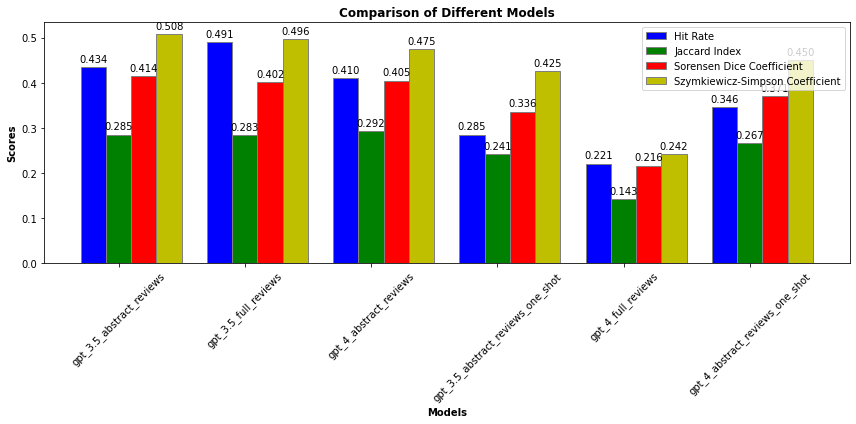

In [95]:
import matplotlib.pyplot as plt

# Extracting data
data = results

models = list(data.keys())
hit_rates = [data[model]['hit_rate'] for model in models]
jaccard_indices = [data[model]['jaccard_index'] for model in models]
sorensen_dice_coefficients = [data[model]['sorensen_dice_coefficient'] for model in models]
szymkiewicz_simpson_coefficient = [data[model]['szymkiewicz_simpson_coefficient'] for model in models]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2

# Positions for bars
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Plotting bars
ax.bar(r1, hit_rates, color='b', width=bar_width, edgecolor='grey', label='Hit Rate')
ax.bar(r2, jaccard_indices, color='g', width=bar_width, edgecolor='grey', label='Jaccard Index')
ax.bar(r3, sorensen_dice_coefficients, color='r', width=bar_width, edgecolor='grey', label='Sorensen Dice Coefficient')
ax.bar(r4, szymkiewicz_simpson_coefficient, color='y', width=bar_width, edgecolor='grey', label='Szymkiewicz-Simpson Coefficient')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = ax.patches
add_labels(bars)

# Adding labels
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Comparison of Different Models', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()